<a href="https://colab.research.google.com/github/Djeutsch/Djeutsch.github.io/blob/master/zindi_weeken_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-of-Required-Dependencies" data-toc-modified-id="Loading-of-Required-Dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading of Required Dependencies</a></span></li><li><span><a href="#Loading-of-Data-and-Preprocessing" data-toc-modified-id="Loading-of-Data-and-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading of Data and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Wrappers" data-toc-modified-id="Wrappers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Wrappers</a></span></li><li><span><a href="#Load-Original-Images-and-Resize-them-to-the-Same-Size" data-toc-modified-id="Load-Original-Images-and-Resize-them-to-the-Same-Size-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load Original Images and Resize them to the Same Size</a></span><ul class="toc-item"><li><span><a href="#Create-the-Training-Set-Images-List-and-Test-Set-Images-List" data-toc-modified-id="Create-the-Training-Set-Images-List-and-Test-Set-Images-List-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Create the Training Set Images List and Test Set Images List</a></span></li><li><span><a href="#Resize-and-Save" data-toc-modified-id="Resize-and-Save-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Resize and Save</a></span></li></ul></li><li><span><a href="#Writing-of-Resized-Training-and-Test-Images-to-CSV-and-HDF5-data-format" data-toc-modified-id="Writing-of-Resized-Training-and-Test-Images-to-CSV-and-HDF5-data-format-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Writing of Resized Training and Test Images to <code>CSV</code> and <code>HDF5</code> data format</a></span><ul class="toc-item"><li><span><a href="#Preparing-the-Appropriate-File-List-(Training,-Test)-for-Resizing" data-toc-modified-id="Preparing-the-Appropriate-File-List-(Training,-Test)-for-Resizing-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Preparing the Appropriate File List (Training, Test) for Resizing</a></span></li><li><span><a href="#Writing-of-Images-to-.CSV-format" data-toc-modified-id="Writing-of-Images-to-.CSV-format-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Writing of Images to <code>.CSV</code> format</a></span></li><li><span><a href="#Writing-of-Images-to-.HDF5-or-.h5-format" data-toc-modified-id="Writing-of-Images-to-.HDF5-or-.h5-format-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Writing of Images to <code>.HDF5</code> or <code>.h5</code> format</a></span></li></ul></li><li><span><a href="#Checking-of-the-Written-Data" data-toc-modified-id="Checking-of-the-Written-Data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Checking of the Written Data</a></span></li></ul></li><li><span><a href="#Sample-Submission" data-toc-modified-id="Sample-Submission-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sample Submission</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Another-Trick-for-Loading-in-your-Own-Data" data-toc-modified-id="Another-Trick-for-Loading-in-your-Own-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Another Trick for Loading in your Own Data</a></span></li><li><span><a href="#Build-the-Model,-compile-and-train" data-toc-modified-id="Build-the-Model,-compile-and-train-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Build the Model, compile and train</a></span></li><li><span><a href="#Use-the-built-model-for-prediction-on-unseen-data" data-toc-modified-id="Use-the-built-model-for-prediction-on-unseen-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Use the built model for prediction on unseen data</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Load-in-our-Trained-Model-and-predict" data-toc-modified-id="Load-in-our-Trained-Model-and-predict-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Load in our Trained Model and predict</a></span></li></ul></li></ul></li></ul></div>

# Spot the Mask Challenge by #ZindiWeekendz


## Loading of Required Dependencies

In [0]:
import os
import sys
import csv
from PIL import Image, ImageOps
import imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#!pip3 install opencv-python
#import cv2
import h5py

## Loading of Data and Preprocessing

The main purpose of this section is to load our data images and convert them into a `.csv` data format in such away that every single row of the .csv file represents an image. We have a directory full of IPEG images and we want to a way to read through them all. To do that we first get a file list as follows.


### Wrappers

Theses are some useful functions that are going to be very relevant during the preprocessing.

In [0]:
def create_file_dir_list(my_dir, fmt=".jpg"):
    file_list = []
    print(my_dir)
    for root, dirs, files in os.walk(my_dir, topdown=False):
        for name in files:
            if name.endswith(fmt):
                full_name = os.path.join(root, name)
                file_list.append(full_name)
            
    return file_list

In [0]:
def match_file_dirs_list(my_dir, training=True):
    """
    Return the lists of the paths to the data of the combined training and test sets.

    params:
    -------
    my_dir: str representing the directory of the images.
    training: a boolean, default true for training set directory, false fot the test set one.
    """
    matched_data_list = []
    train_labels = pd.read_csv("../train_labels.csv")
    train_img_name_list = train_labels["image"].tolist()
    files = os.listdir(my_dir)
    if not training:
        matched_data_list = [name for name in files if name not in train_img_name_list]
        matched_data_list = [my_dir+name for name in matched_data_list if name.split(".")[-1] in ["png", "jpg", "jpeg"]]
        
    else:
        matched_data_list = [my_dir+name for name in train_img_name_list]
            
    return matched_data_list

### Load Original Images and Resize them to the Same Size

To speed up the training and processing we are going to resize all the images to the same size `img_size=250`. Note that all images are not in `.jpg` format, some are in a `.png`. However, `.jpg` format does not support transparency as `RGBA`. This means `Red`, `Green`, `Blue` and `Alpha`. `Alpha` is transparency. Therefore, we would need to discard the `Alpha` channel or save the image as something that supports transparency, e.g: `.png` format. The `Image` class from `PIL` package has a method `convert` with can be used to convert `RGBA` to `RGB`, and after that we will be able to save the image as `.jpg`.

In [0]:
def resize_and_save(path_of_file, saving_dir, img_size=250):
    """
    Return the input image path_of_file resized to img_size X img_size.
    
    Params:
    -------
    path_of_file: this is the path to the image to be resized.
    saving_dir: this is the directory where to save the resized image.
    img_size: the size to which you want to resize your image.
    """
    
    # Open the original image.
    original_img = Image.open(path_of_file)
    # Resize the original image by preserving the original aspect ratio.
    resized_img = ImageOps.fit(original_img, (img_size, img_size), Image.ANTIALIAS)
    # If interested in resizing the original image by ignoring the original aspect ratio.
#     img_resized = original_img.resize((img_size, img_size))
    # Get rid of the transparency in the image, e.g png images (RGBA), by converting it to RGB.
    resized_img_rgb = resized_img.convert("RGB")
    # Save the resized as jpg image.
    imageio.imsave(saving_dir + path_of_file.split("/")[-1], np.asarray(resized_img_rgb))
        

#### Create the Training Set Images List and Test Set Images List

In [0]:
### Preparing the data for resizing
my_dir = "../images/"

### Training
train_labels = pd.read_csv("../train_labels.csv")
train_img_name_list = train_labels.image.tolist()

### Test
img_name_list = os.listdir(my_dir)
test_img_name_list = [name for name in img_name_list if name not in train_img_name_list]

In [0]:
len(train_img_name_list), len(test_img_name_list)

(1308, 509)

#### Resize and Save

In [0]:
### Training data
path = "../images/"
saving_dir = "../data/train/"
img_size = 250
for file in train_img_name_list:
    print(file)
    path_of_file = path + file
    resize_and_save(path_of_file, saving_dir, img_size)

tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg
rxgismgsvmaayzjarbfjaljhqmpbrt.jpg
uuzshfrhkgrkolhwdvliqauzulurnz.jpg
mjspxsagzusaznvnyxgamtrlqkqklp.jpg
rlbmuajgezfiddjzlyeoupxpqubkpt.jpg
ngvvhadzegowlxligtftkbucwyphvw.jpg
qlwbzgvdyqwncrvqzaezrrqlwuugdp.jpg
lbbmpcbdwgdbskcdmsanklchyknuig.jpg
xgpvctqkxpuljjixphprbdrkcuzfoi.jpg
tszmhququgjczggoxanwvdlzbdbxhb.jpg
qvqhxwbgpskanqpsfbigdmbpkenvgk.jpg
eqirckpknxclvrlxvfxaswsodbxlmm.jpg
yoewqnzdgdhogcwdageakflfeogisq.jpg
hpnmywojyjwgptgkflzydzenfxbtlr.png
dnzimlvqpkwyhmsdwqwpuewzbdqzmg.png
hcysrvramduefsgkkgvqbmxzlodgal.jpg
spdcmncwcnpqagxrlivyldeknnfcvr.jpg
zaemovvkdftxvorancdugwjzuodbmm.jpg
uvpqnqfujwsxhbgvfbvcidhcqnyuum.jpg
kzgroxmxsdfrkxusymupjaxumbwoow.jpg
cjsjioqkweumqcnobaydijuvfvtrel.jpg
iehmewhtlomanneoicvbyjonzzcbhh.jpg
uiclughuenqkjonhhjgjclflpqkhsk.jpg
hfbevhhmejjmdndclkpyeyaideyjgp.jpg
pmociluihyptefnqdlihzzodiczkso.jpg
qkishcozhztulvrhvodbabprxomeuq.jpg
gvpxmmxppqjudjgopzedpjxypiptvv.jpg
puqorndzkjfvoumnsalrxwtagkatzx.jpg
onyffqwtwwbgvwxhhvfy

hqekuvpyyasgcjhbkttdepbndlinmy.jpg
uxydkggabzowknogwrfvrtputpjdjd.jpg
mkastywzworowdxeuctnhvbhwcjlcn.jpg
tslxepigefkmddeykwqaewrygtslwr.jpg
ogtkupzlrvufiponfimdpeocnxhvpk.jpg
fusqppukkoqlzlqylwaoenicbulzhk.jpg
nbmzvzwjridginemsejzgvvwkixniq.jpg
dneansozlgoktirzhykdooadkhiwhq.jpg
jhhtcvigjostbkkgggaamtwzurnqer.jpg
fqkgmohcyrwitoufxpoovwogpciawl.jpg
lqllkwuuiizdblmgqvsumboutwycbh.jpg
niaxfkfesixkvwlpwonntlqqsbrjor.jpg
utedtuuathvzhxpzxinudngjishbbp.jpg
bpwzubqeojttiklnrskmqheackknsn.jpg
bhlaxcbmkuzxpudcoliyjwbjfgzped.jpg
cnlmaezsbsykjrtguadjaevcaqhart.jpg
ocvraqvlvcbftlvhemucifqrtkvxgx.jpg
ihgmzyexcvpdzxsazmgbxqoyouzoaj.jpg
yzatnbwsgrqvqpsnxslzyfkckvoepx.jpg
ovvsvrvfrfspbyqyuqbiofwuvfconu.jpg
pprrewdbyvocdowungzgnyvbgeehol.jpg
izkfunqylvjvtyzxxvjzlggtjtijfi.png
aveyxuohexvwmtgiqqldejobxhcbru.jpg
aeoznpwjxjsawhiousrpjrxmeltnkw.jpg
jgrkuacafspvvcpdxeydeicyldovsx.jpg
gqmexiddrtuljtycctgadegzqycifc.png
qyqvkjizaxvsfcgnhurnzbzmoxbltz.jpg
ikmfldaptchowfrgmzrgssiqkjicyw.jpg
nhjvztqdqtiiriktdreo

pfhdkjlmhlatgfauqnoagoubkxccah.jpg
hliwxrvmssilvybjbccoaxecnltylv.jpg
gyufmuyplkhgejrjmsenqbbtcdaawf.jpg
btxrtykxyndbccgvyboscqgesotvhy.jpg
hdkrlyaphygybkarupttnzhzmopelk.jpg
ekyurepahzoaxcofcxlnjlwebjzsrt.jpg
krvzqzlunkaseffqvkvryniendykfg.jpg
vowykwetsbqrojhitqvjnahcsbybxk.jpg
qrzxncrfkjyavdjajjcksslcftadbk.jpg
fgwjrbepbyjmakbkjmqwbivmqwznez.jpg
kzdiezepouxsilvucuvngokzejbukx.jpeg
pyjadmrpperkkiavagwhiuxyfoncxx.jpg
opitzcdsxnaudhsskebbpddfrizcmb.jpg
lfksbuaqwrieayohbfptmumbfjdebb.jpg
yqjgzjfimcosaiooagedxshaqvyohm.jpg
axgzuajfnlaucpbqcaefhqeczaeebl.jpg
ikhlomyatxfvjjynfgpmyquiqlzufq.jpg
knksbcprgvtefnwojmwjjfgunjbcfo.jpg
jsshpeconezopjazqepucqtvkuxkyn.jpg
dqhgxnmlcyindyufkvtbxzhwmwgbum.jpg
ymdebxtkxelgjcfcjjpmhfudampdxj.jpg
tlxqlatzdxqoocgbfpvvatxxqosfbh.jpg
ppfbcnhfnqgnhkedevzxomwqrjtsgk.jpg
tqlkdrgyxadrgxdsteqndjrsdcpzry.jpg
vtpnyeyupdwxmykjczbhacybmfpxyt.jpg
qrszgqeyvimvdknvmkexzzotmlhvoh.jpg
nmrfconhojuuwqaszmvlzsnywysruv.jpg
mmyzpsubrlmncomjiljweurkyxwtoq.jpg
kxdrybuvxglafohrxfh

bzrsikipeicitszmwmfqytppuajwiu.jpg
iiocytanewmdbjhijzbaeukvprozkl.jpg
ptpvmwazzkhcsbxhrnflggepsqozbp.jpg
nnicvcsnojpjoogiukdyvyyclynvwg.jpg
vrsmwcirdmmrwrhqqspnhzexfaqtvd.jpg
xjaxtjkekahfcifoqlgllswwfyebug.jpg
mdaiwelvdrvnwdvmiscgleenkqplav.jpg
zvzkkzsfdqmjtlrhvthrhdtepmqsid.jpg
atdwaouazthyftuuesnxnwlhsrpyro.jpg
aqkluebfguwjhfdnbtawdmdqodyyeu.jpg
jlktvfsmpqlvkrrqdgasnhoakjrjqj.jpg
ceozklyaiyxgecshtygxhifbdvrash.jpg
pfutfxmybthfstflqplbghxjwekymi.jpg
ruumdlbzximznkdvthbbslwtoojgmh.jpg
jirnnxrgdbshaungrbvvvekddkeerh.jpg
juorxdrpbajlawyahstvwdoddptwlk.jpg
mlldevmpqhoamrbrrlvnrktvlgfgwn.jpg
orvfmmbzokxrfzzebqwhmdxtabiphp.jpg
fohxsjmbxsoevtjrjdlmghiuiqliph.jpg
azazbwzigdzxxsvmcizyuqgivdyhzn.jpg
lfpqyqobvryudfxxcabcncphmtavle.jpg
uceyzrlbtdzbqhiousxplkcrbpmrek.jpg
hguumdaaqstpcffrlexqqlngjimmdo.jpg
mbfvsfzeavinlickncknujiiijozlp.jpg
hmekbeggwejgmeyiyeikmfmpblypqi.jpg
uzewooxjwzphkroseskteuzyuzjgrr.jpg
yejtjqvmwykfupgbxztgisddkihejv.jpg
azadjuyizexjplduvaljrdnrjtanva.jpg
cswbdmyixhgdmijgyjub

cruutpydetlyxxnzfjkedebmqxawxh.jpg
rftqcdlvfxatxhauwjymyodlmwqhfg.jpg
qzzmkojhpgzvkvqkaojqmuxyvmblpv.jpg
zzvhkvgfjudiormxthpoglrmgvphgz.jpg
ovodrkrurbwedmjzbetggroiixdohe.jpg
ylxeiydkcifgvqtjxslawmjtydssls.jpg
ztkarwcdrtkcugmxfsrrqhrnvtfdwl.jpg
pruszffxzorshwrtgdlwuatljbpbsc.jpg
bypdthgrbdszfzyxdhptlbgmxbueyj.jpg
kuvzssnqboopvvacenjfgzglajsfsk.jpg
lbygnlteqjorvaydrxitimxooycnsg.png
esnluvhtqidrmszlwleweibivslvrr.jpg
astkaukqxmqjuyncgvwfzbydgbtlvg.jpg
jwghapwjcmxmqiohoeavwpazwuvsqr.jpg
acbcufgusmnchzbuiuxluaizkqvobc.jpg
vtdmprftpswnzxwrgrucszdhsnehla.jpg
vlaprkozrjwhwcdcbzzvlzleiagwlr.png
zpfqpwuxxlpsshtufxtixxtivzbpfw.jpg
qfeygtqkgfdtbmunzdmaralauijizb.jpg
hzbycyfzfvrybvbpvohglfbqmirtva.png
udrihxpesafdlhzdgdxyrkjwxluirs.jpg
ysbjqxmnejtmiwzlgqgtlnryleidye.jpg
nsyuicacwfiabdxiadkdzregwcpaas.jpg
cvkfdxcopqlrsadqmweypjtbmdsxab.jpg
hijxddncbcjlrtfnhxiiknslsottkh.jpg
ghrmrfrolhxyxvjxptjaiaixlbholy.jpg
zkwxmjokrrqcphllpzccmpnxxxxwgl.jpg
uckabtcfikfnyigvguvdsxjphbqixe.jpg
zdjeqwahvijdfbomkmwa

nafxvtltrsnzawzesvlhrhogoyhhhy.jpg
xplnsocurfzjaqwmklwdrqhrfkkagk.jpg
asxjlptqlncdhuwnrmitrnfibrwvnq.jpg
kxfznbfvtkjmbxyfbqdsscmufgwero.jpg
bzplufpvmvfbbmbpqrozifdlelvjcf.jpg
kviztjbqgksyakfnhtqrndymtxunwz.jpg
gkxebviifcnfepepkzewerqlksciqa.jpg
pgmrvereabkbbzludfomyvwnmegral.jpg
cuyrcyiknlfplflhwhntqniyetqrdd.jpg
vicsvtopykjpjxindgzidwuvncbygv.jpg
vijkbvsrsmeurpxvwagjotamxlbrgk.jpg
bmipwwyounohgccldmwellfetufruq.jpg
wxgzvierevhtojakpqfsrlfhaqjdbf.jpg
coovnsfdkljilkmozibvtrrocukecq.jpg
zxbxybrknsjnwvnzdoyvduxocvmhcy.jpg
bumysvveeazrijrxjggemuksmzrnxo.jpg
lxzynbetcyiklhdyzzmccnphmutysh.jpg
eaxmwpspgnifqyfwbzbocbzhnvgyzo.jpg
acrbwwcknudlvwfjvfbreeatynhfov.jpg
ofpvlsvfmxdlakaztvzwwdegjvdofc.jpg
tjpvlyiyhycyouaxgnvyimsvolrequ.jpg
lnfpehvsapfzlwgnlvtfhsgivvuena.jpg
khtbxzclczktnqchxmxfvegnyikmqi.jpg
xfjcfajxezguwihtaskxrekkfuhmzv.jpg
pmsrgfqsvkwejgxorxgepvewttdxkr.jpg
oxwdopunokwctggrbwuloaqxynuqkl.jpg
jksxjzngyhlhjwmohzjijnqwvgpvtx.png
bbjxnuqmvboqpfkaphzvtzsocoyxri.jpg
npflwmbacyzuopbqgqpx

In [0]:
### Test data
path = "../images/"
saving_dir = "../data/test/"
img_size = 250
for file in test_img_name_list:
    print(file)
    path_of_file = path + file
    resize_and_save(path_of_file, saving_dir, img_size)

jcqewjmnixvdytkvwuvgywcblhvotx.jpg
orzwzwgaccsbeglnbxsitvpxcivdcm.jpg
pbndybjpdykkiinslkpnepifijnsvd.jpg
zuxvwdblfwjpibjexgfglpyreqslhs.jpg
zneawovpezfvxphxdlzgpjhllyxuss.jpg
kmxjicdqvpfpvrhqukkpumdscvgnob.jpg
ufjcnzoabfdevufathmxztkvmlfgmd.jpg
dxkxrtwzulytuhegnxjznhxxsqdvjt.jpg
llecnksnwfhbpbcjzzijseaoxblcbo.jpg
ixbtflbbatnitjiveitztqwnjfvidt.jpg
gdwbhsehebmpgcfbndlibiccryfxid.jpg
dobrsakjzqfkkwbuvhfpxgjynstyjd.jpg
gbdwbyuafezgszupikmwrdivflidna.jpg
dshtrcyfhcxdnmqcpqaachrxbmraqm.png
zhkdanqqseexvicplcyekiwjqqlhhz.jpg
bynakhmyescxfghpzliqaaewgtlhas.jpg
dyjtodxzlakemnjmxwcvxezykwmvoo.jpg
yegdjxoapgowmbnvlrdryvaecnynya.jpg
bivegebpyjsmiaylkruufjevjxqydc.jpg
duythftfcibydcrmobngveppsbczuq.jpg
wwibybtbnrvydizirztvgsbuulpouw.jpg
greuliaymizfmfvngfqmrbzayusphp.jpg
ilyczntkhdwwqxgayvmewwrvonzokc.jpg
aadawlxbmapqrblgxyzarhjasgiobu.png
sseuokumxzgersmrlhofzkzgrkozkq.png
zkmcdlytdocncvgmigqhklfvjqwrni.jpg
wqzkxqasodsnxcugavcqsuqmdwqfoa.png
griokgoxjwgbtlffxnqnoefynizroa.jpg
wrtiyoywiyiawtrnbizx

ezmnotqwlrngiwgnwbaheeoueyxvny.jpg
xkoqrazzrpistsmscyvjarmiuwljsd.jpg
qjkcqczswvymlnybfyqxppcwciayzz.jpg
osirultbdzsgmknbqrucggtqnfoljs.jpg
qsgsfxhekupbygbbjmhmgmheylbals.jpg
dfbqqsvocxgkdljrvnnztyvaexmxgp.jpg
loyubqchniltkypeilmzrmwjnvjeiq.jpg
snqqviwsotitwwrblhtiabhvphphqw.jpg
pydsgdgzcvormzgjxmsqxgizigmnqq.jpg
cxtbkqwdjxgxlieyzzfokybmrynvzt.jpg
iwrrnosiwxykcwfnzdnephwjeynjvr.jpg
qskzbotijtjaphichunoesuwbybguk.png
jdmorbhddqxvqofbotgldacezkmyjt.jpg
imkumwldsvcwkjbhwglebnqtgjuaqy.jpg
gjppsnmwvegpfaotczwscojavigasa.jpg
eowgxpfwjhfpfvoytzlejmtyxegcfx.jpg
fhhipzleexntfxjqfztvtikwqlylfz.jpg
clcluoyktakfjgcjyjgbbrhaxjkanl.jpg
siqobtmqebviudcxtjszqquivmzvil.jpg
csrqrzoyceubuehyicuwjisnsvyfuk.jpg
dbuvujopjxofqfcsxghgeruyrhqamf.jpg
vwqrhobzdutxipuwgssuzjbhxumbod.jpg
tbjzvqedthirsztsnsjkfrdgroofmt.jpg
mtkmqoxjnmplockjwdilejfsrxcbvy.jpg
yoljgngorsosxyvpmflodycbrzlojm.jpg
jsrbntbtdheogzmdzhatavcmmarvgl.jpg
xqhpwicnsoejqslgrlwvntqhqdrjjt.jpg
nhbvrxtecdhhvyyzdjumuhxwfgsnqf.jpg
opdeeeogjakgkmhchcmf

lzvnzvftxmsgfnxqriwbranxlyjumy.jpg
eusetdoazbgklyqcezwcacrokjcufo.jpg
ethbvskgnyzyuirqytshhzvyzbqjxv.jpg
tzwrmkyyhlxjrbedtztknvlrgdmnfq.jpg
utjaezxnmbadaiqjqgkmdmfdzqozqr.jpg
nbpkndryqyojnydlzlnfibqdhnsjzo.jpg
lpozqsannlntslamuxvcfpbjttiihl.jpg
ayqcgikqwwnikkwdufxnxhfixdpelp.jpg
ytxadvbbcvbohxmbtvnyepjzdskwli.jpg
wischoicbrogjyfnhdycphsaneiuwm.jpg
ccliaukfdmqskirlsqaemkdtziyhos.jpg
txjtghyvfckkbeihbmqcamrwmhfwfr.jpg
ktfusajinfwbuflriajdptixqssvun.jpg
clibkrbidguqcugbkymxqioqwolsvv.jpg
bfjrheksmajsxlorqmwtpwjonzkyiv.jpg
xkdueyinwrnlyioamfbqqymynyyjow.jpg
rbztrgnugpkdoaxagndgdjbijoqele.jpg
gvykagbusbpbuzcvkftzaatczcevwk.png
vlxbaplwagipvtfkcjbzapysqmffld.jpg
jelzmmcmozeaeiswvdkwcltfccanwg.jpg
qgseasopsvkydhuvnlfmzqbgjydsys.jpg
wdlioyaloeejrcvmjpixqoczoesuns.jpg
qipkjvcthoccixqxbsdcqgjtzmqvcq.jpg
aelkivmayxgsdjosiibfgmkvfrjvjk.jpg
raoltfuznhttwcfpscjepcqakdkmey.jpg
vluqtgdfiywtuveucboijzbanifapn.jpg
usdqhnysmqfjitrxqnfxkureaphlsa.jpg
imzjoogcbcvsgkbekgsxdfhxdlodgb.jpg
phpzhjjsvyqxouxeeaet

In [0]:
img_size = 200
original_img = Image.open(path_of_file)
resized_img = ImageOps.fit(original_img, (img_size, img_size), Image.ANTIALIAS)

Text(0.5, 1.0, 'Reconvert to RGB')

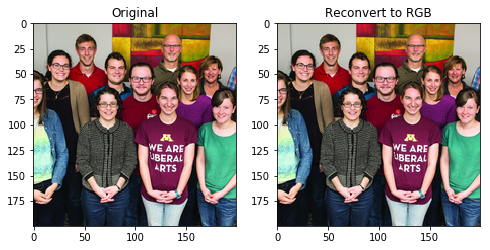

In [0]:
rgb_im = resized_img.convert('RGB')

fig, ax = plt.subplots(1, 2, figsize=[8,4])
ax[0].imshow(resized_img)
ax[0].set_title("Original")
ax[1].imshow(rgb_im)
ax[1].set_title("Reconvert to RGB")

Text(0.5, 1.0, 'Reconvert to Greyscale')

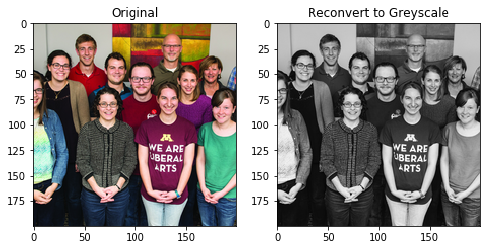

In [0]:
img_grey = resized_img.convert("L")

fig, ax = plt.subplots(1, 2, figsize=[8,4])
ax[0].imshow(resized_img)
ax[0].set_title("Original")
ax[1].imshow(img_grey)
ax[1].set_title("Reconvert to Greyscale")

### Writing of Resized Training and Test Images to `CSV` and `HDF5` data format

Referring to the aforementioned main purpose of this section on data preprocessing, here we are going to convert the resized training and test images to `np.ndarrays`, and writing of each image as a single row in a `.csv` file.


#### Preparing the Appropriate File List (Training, Test) for Resizing

In [0]:
### Getting the lists of the paths of the images in the training or test set.

### For training set
my_dir = "../data/train/"
my_train_img_list = match_file_dirs_list(my_dir, training=True)

### Fro test set
my_dir = "../data/test/"
my_test_img_list = match_file_dirs_list(my_dir, training=False)

In [0]:
len(my_train_img_list), len(my_test_img_list)

(1308, 509)

#### Writing of Images to `.CSV` format

In [0]:
def writer_image_to_csv(files_list, path_saving_file):
    
    ls_data = []

    for file in files_list:
        img_file = Image.open(file)

        # Making of Greyscale image insted RGB image (save size)
        img_grey = img_file.convert("L")
        # img_grey.save("result.png") # If interested in saving the greyscale image.

        # Saving the Greyscale values/pixels.
        value = np.asarray(img_grey)
        
        #value = value.flatten() # But not wise as we won't be able to know the size of the image
        ls_data.append([file.split("/")[-1], value])
    
    df = pd.DataFrame(data=ls_data, columns=["image", "data"])
    df.to_csv(path_saving_file, index=False, encoding="utf-8")
    
    return df

In [0]:
### Writing the training set
path_saving_file = "../data/train_set_X_orig.csv"
files_list = my_train_img_list[:]
trainX = writer_image_to_csv(files_list, path_saving_file)

In [0]:
trainX.head()

,image,data
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,"[[191, 189, 186, 187, 187, 186, 181, 177, 165,..."
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,"[[150, 152, 156, 159, 164, 168, 173, 177, 181,..."
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,"[[220, 220, 220, 221, 221, 222, 222, 222, 224,..."
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,"[[240, 240, 240, 240, 240, 240, 240, 240, 240,..."
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,"[[205, 205, 205, 206, 206, 207, 207, 207, 209,..."


In [0]:
train_labels.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


In [0]:
### Writing the test set
path_saving_file = "../data/test_set_X_orig.csv"
files_list = my_test_img_list[:]
testX = writer_image_to_csv(files_list, path_saving_file)

#### Writing of Images to `.HDF5` or `.h5` format

`.HDF5` format is a powerful binary data format with no upper limit on the file size. It provides parallel IO, and carries out a bunch of low level optimizations under the hood to make queries faster and storage requirements smaller.

Here we are going to save as a single `.h5` file the training and test data and also the target for the training data.

In [0]:
path_of_saving_file = "../data/train_test_data.h5"

with h5py.File(path_of_saving_file, "w") as hf:
    hf.create_dataset("train_x", data = np.stack(trainX.data.tolist(), axis=0))
    hf.create_dataset("train_y", data = np.stack(train_labels.target.tolist(), axis=0))
    hf.create_dataset("test_x", data = np.stack(testX.data.tolist(), axis=0))

All we need to do now is close the file, `hf`, as follows; which will write all of our work to disk.

In [0]:
hf.close()

In [0]:
target

array([0, 1, 0, ..., 1, 0, 0])

### Checking of the Written Data

In [0]:
train_set_X_orig = pd.read_csv("../data/train_set_X_orig.csv", )
train_labels = pd.read_csv("../train_labels.csv")
test_set_X_orig = pd.read_csv("../data/test_set_X_orig.csv", )

In [0]:
train_set_X_orig.head()

,image,data
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,[[191 189 186 ... 30 19 19]\n [190 188 187 ...
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,[[150 152 156 ... 161 160 160]\n [151 152 157 ...
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,[[220 220 220 ... 219 217 217]\n [220 220 221 ...
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,[[240 240 240 ... 254 254 254]\n [240 240 240 ...
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,[[205 205 205 ... 204 198 193]\n [205 205 206 ...


In [0]:
train_labels.tail()

,image,target
1303,hxjwafskxmlfaotwaklzuwuccsbxfu.jpg,0
1304,oyodauphffgmzmvqlykcfvmyxartok.jpg,1
1305,uppvtemhkneqggtbfubeccqjvyefiw.png,1
1306,mzjjvzkzvqmyukzsegtoktaslejcdz.jpg,0
1307,dbjdjyhnbvblwhhnfzaahzhdezbbib.jpg,0


In [0]:
train_set_X_orig.shape, train_labels.shape, test_set_X_orig.shape

((1308, 2), (1308, 2), (509, 2))

In [0]:
hf = h5py.File("../data/train_test_data.h5", "r")

In [0]:
list(hf.keys())

['test_x', 'train_x', 'train_y']

These return a `HDF5` dataset object. To convert these to an array, we just call `np.array()` method.

In [0]:
train_x = np.array(hf.get("train_x"))
train_y = np.array(hf.get("train_y"))
test_x = np.array(hf.get("test_x"))

In [0]:
idx = -23
img1 = trainX.data.values[idx]
img2 = train_x[idx,:]
img3 = testX.data.values[idx]
img4 = test_x[idx,:]
img1 = Image.fromarray(img1)
img2 = Image.fromarray(img2)
img3 = Image.fromarray(img3)
img4 = Image.fromarray(img4)

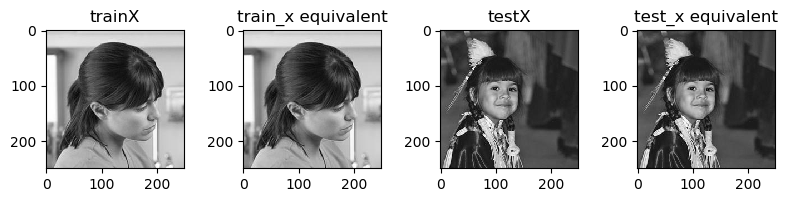

In [0]:
fig, ax = plt.subplots(1, 4, figsize=[8,4], dpi=100)
ax[0].imshow(img1)
ax[0].set_title("trainX")
ax[1].imshow(img2)
ax[1].set_title("train_x equivalent")
ax[2].imshow(img3)
ax[2].set_title("testX")
ax[3].imshow(img4)
ax[3].set_title("test_x equivalent")

fig.tight_layout()

## Sample Submission

In [0]:
sample_submission = pd.read_csv("../sample_sub_v2.csv")
sample_submission.head(10)

,image,target
0,aadawlxbmapqrblgxyzarhjasgiobu.png,0
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg,0
2,aclkjfvackiieiznzfcwienplielrj.jpg,0
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg,0
4,aelzzshpfxerelefnkatpczktuxjln.jpg,0
5,ajnjnkvstqesvfohaptobyasrkmcnq.jpg,0
6,akkydnvilgvzigllmboonbqbbioocs.jpg,0
7,akvjfjhgayyjwrqrczjbeyoqhhajis.jpg,0
8,alcveyvosnywyjbmngolmnblftdoje.jpg,0
9,alfuzzlrjkdrrzauiswqnuvpvzfluc.jpg,0


In [0]:
sample_submission.dtypes

image     object
target     int64
dtype: object

In [0]:
sample_submission.shape

(509, 2)

## Model 

Finally we have come to the point that we will be building a model to provide the **probability that an image contains at least one mask**. Specifically, for each unique image **ID** we should estimate the likelihood that the image contains at least one mask, with an estimated probability value between 0 and 1.

Our model should:

- create placeholders
- initialize parameters
- forward propagate
- compute the cost
- create an optimizer

Finally we will create a session and run a for loop  for `num_epochs`, get the `mini-batches`, and then for each `mini-batch` we will optimize the function. [Hint for initializing the variables](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer)

### Another Trick for Loading in your Own Data

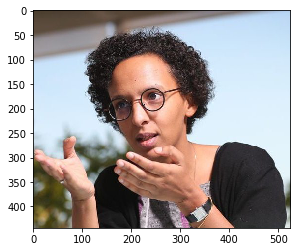

In [0]:
data_dir = "../images/"
for img in os.listdir(data_dir):
    path_of_file = os.path.join(data_dir, img) # Path to the images
    img_array = np.asarray(Image.open(path_of_file))
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break

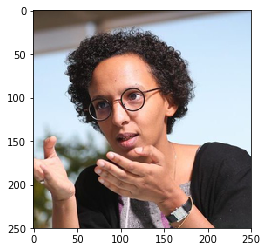

In [0]:
img_size = 250
new_array = ImageOps.fit(Image.open(path_of_file), (img_size, img_size), Image.ANTIALIAS)
new_array = np.asarray(new_array)
plt.imshow(new_array, cmap="gray")
plt.show()

In [0]:
training_data = []

def create_training_data(img_size = 250):
    name_list = train_labels.image.tolist()
    target_list = train_labels.target.tolist()
    for name in name_list:
        try:
            class_num = target_list[name_list.index(name)] # The class of the image called name
            path_of_file = os.path.join(data_dir, name) # Path to the images
            img = Image.open(path_of_file)
            img_grey = img.convert("L")
            new_array = np.asarray(ImageOps.fit(img_grey, (img_size, img_size), Image.ANTIALIAS))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass

create_training_data()

In [0]:
len(training_data)

1308

In [0]:
### Now let's shuffle our data
import random
random.shuffle(training_data)

In [0]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
1
0
1
1
0
0


Let's take this data now, and now that it is shuffled, let's pack it into the variables that we are going to use right before we feed it into our neural network. That is going to be `x` and `y`.

In [0]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

# Remember to see at the end if it will be possible to convert the ConvNet output to an RGB image.
X = np.array(x).reshape(-1, img_size, img_size, 1)

In [0]:
X.shape

(1308, 250, 250, 1)

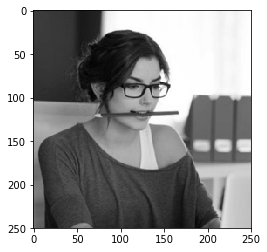

In [0]:
plt.imshow(training_data[0][0], cmap="gray")
plt.show()

In [0]:
### Save our data to avoid redoing the same at the end.
import pickle

pickle_out = open("../data/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("../data/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [0]:
pickle_in = open("../data/X.pickle", "rb")
X = pickle.load(pickle_in)

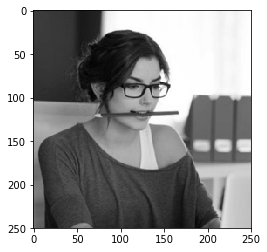

In [0]:
plt.imshow(X[0,:,:,0], cmap="gray")
plt.show()

In [0]:
import seaborn as sns

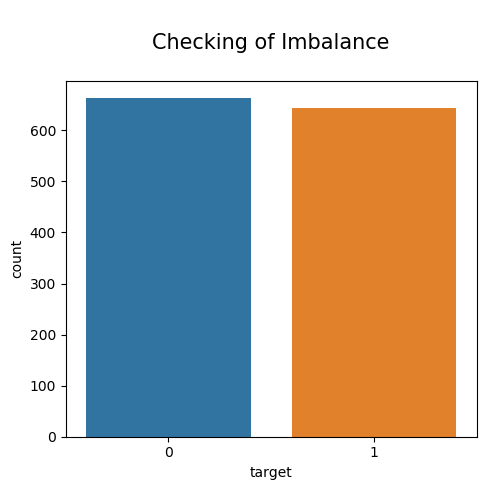

In [0]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

sns.countplot(x="target", data=train_labels, ax=ax)
ax.set_title("\nChecking of Imbalance\n", fontsize=15)

fig.tight_layout();

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


ModuleNotFoundError: No module named 'tensorflow'

Consider normalizing the data. The easy way is to scale the data. Knowing that for image data the max pixel is 255 and the min is 0, then we can just divide our data by 255.

In [0]:
X = pickle.load(open("../data/X.pickle", "rb"))
y = pickle.load(open("../data/y.pickle", "rb"))

X = X/255.0

In [0]:
X

array([[[[0.26666667],
         [0.26666667],
         [0.26666667],
         ...,
         [0.99607843],
         [0.99607843],
         [0.99607843]],

        [[0.26666667],
         [0.26666667],
         [0.26666667],
         ...,
         [0.99607843],
         [0.99607843],
         [0.99607843]],

        [[0.26666667],
         [0.26666667],
         [0.26666667],
         ...,
         [0.99607843],
         [0.99607843],
         [0.99607843]],

        ...,

        [[0.45490196],
         [0.44705882],
         [0.43921569],
         ...,
         [0.76078431],
         [0.76078431],
         [0.75686275]],

        [[0.45490196],
         [0.44705882],
         [0.43921569],
         ...,
         [0.76078431],
         [0.76078431],
         [0.75686275]],

        [[0.45490196],
         [0.44705882],
         [0.43921569],
         ...,
         [0.76078431],
         [0.76078431],
         [0.75686275]]],


       [[[0.09411765],
         [0.08627451],
         [0.08

### Build the Model, compile and train

In [0]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(X, y, batch_size=32, validation_split=0.1)

### Use the built model for prediction on unseen data


#### Data Preparation

In [0]:
test_data = []
def prepare_test_data(data_dir):
    img_size = 250
    file_names = os.listdir(data_dir)
    for name in file_names:
        try:
            path_of_file = os.path.join(data_dir, name) # Path to the images
            img = Image.open(path_of_file)
            img_grey = img.convert("L")
            new_array = np.asarray(ImageOps.fit(img_grey, (img_size, img_size), Image.ANTIALIAS))
            new_array = new_array.reshape(-1, img_size, img_size, 1)
            test_data.append([new_array, name])
        except Exception as e:
            pass

data_dir = "../data/test/"
prepare_test_data(data_dir)

test_X = []
test_X_ID = []

for features, img_names in test_data:
    test_X.append(features)
    test_X_ID.append(img_names)

print(len(test_X), len(test_X_ID))

509 509


In [0]:
## Save our data to avoid redoing the same at the end.
import pickle

pickle_out = open("../data/test_X.pickle", "wb")
pickle.dump(test_X, pickle_out)
pickle_out.close()

pickle_out = open("../data/test_X_ID.pickle", "wb")
pickle.dump(test_X_ID, pickle_out)
pickle_out.close()

In [0]:
pickle_in1 = pickle.load(open("../data/test_X.pickle", "rb"))
pickle_in2 = pickle.load(open("../data/test_X_ID.pickle", "rb"))

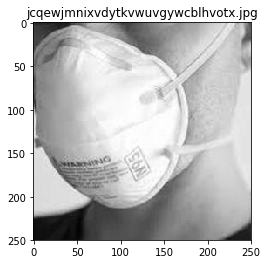

In [0]:
plt.imshow(pickle_in1[0][0,:,:,0], cmap="gray")
plt.title(pickle_in2[0])
plt.show()

#### Load in our Trained Model and predict

In [0]:
Model = tf.keras.models.load_model("model-name.model")

In [0]:
### Always predict a list
prediction = Model.predict([new_data[0]])
print(int(prediction[0][0]))

In [0]:
print("\nHere are your first 10 rows:\n\n{}".format(train_labels.head(10)))


Here are your first 10 rows:

                                image  target
0  tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg       0
1  rxgismgsvmaayzjarbfjaljhqmpbrt.jpg       1
2  uuzshfrhkgrkolhwdvliqauzulurnz.jpg       0
3  mjspxsagzusaznvnyxgamtrlqkqklp.jpg       0
4  rlbmuajgezfiddjzlyeoupxpqubkpt.jpg       1
5  ngvvhadzegowlxligtftkbucwyphvw.jpg       0
6  qlwbzgvdyqwncrvqzaezrrqlwuugdp.jpg       1
7  lbbmpcbdwgdbskcdmsanklchyknuig.jpg       0
8  xgpvctqkxpuljjixphprbdrkcuzfoi.jpg       0
9  tszmhququgjczggoxanwvdlzbdbxhb.jpg       0
